In [72]:
# Importando Libs

# modelagem e matrizes
import numpy as np
import pandas as pd

# análises gráficas
import matplotlib.pyplot as plt
import seaborn as sns 

# ignorar avisos
import warnings

# desabilitando avisos
warnings.filterwarnings('ignore')



In [73]:
# lendo dados
Base_Dados = pd.read_csv('PS4_GamesSales.csv', encoding='latin-1')

Base_Dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [74]:
# dimensão
Base_Dados.shape

(1034, 9)

In [75]:
# campos nulos
Base_Dados.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

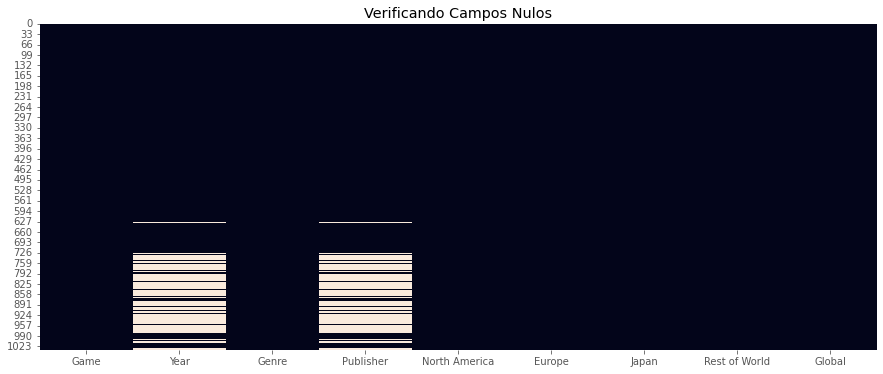

In [76]:
# nulos gráficos
plt.figure(figsize=(15,6))
plt.title('Verificando Campos Nulos')
sns.heatmap(Base_Dados.isnull(), cbar=False);

In [77]:
# retirando os valores nules
Base_Dados.dropna(inplace=True)

In [78]:
# estatísticas
Base_Dados.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


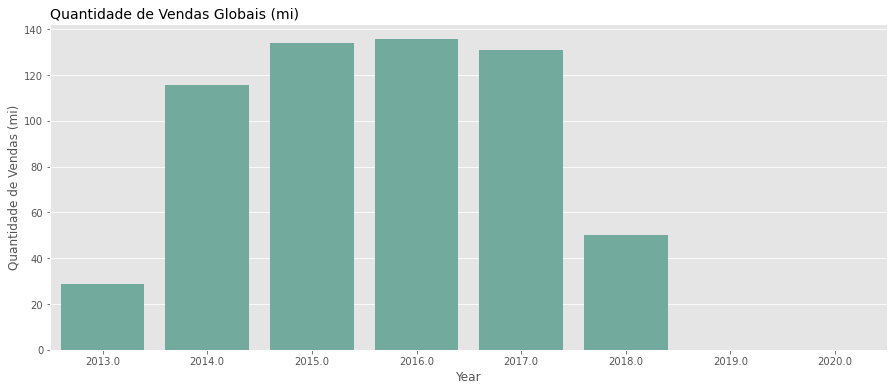

In [79]:
# tamanho da imagem
plt.figure(figsize=(15,6))

# título
plt.title('Quantidade de Vendas Globais (mi)', loc='left', fontsize=14)

# gráfico
sns.barplot(data=Base_Dados, x='Year', y='Global', ci=None, color='#69b3a2', estimator=sum)

# label
plt.ylabel('Quantidade de Vendas (mi)');

In [80]:
# retirar os anos 2019 e 2020
Base_Dados = Base_Dados.loc[(Base_Dados['Year'] != 2019) & (Base_Dados['Year'] != 2020)]

Base_Dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


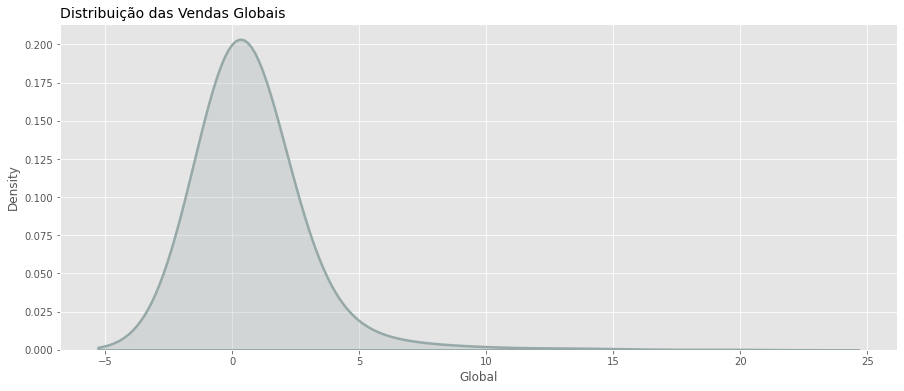

In [81]:
# tamanho
plt.figure(figsize=(15,6))

# estilo
plt.style.use('ggplot')

# título
plt.title('Distribuição das Vendas Globais', loc='left', size=14)

# plot
sns.kdeplot(Base_Dados['Global'], shade=True, bw=1, color='#96a8a8', linewidth=2.5);

In [82]:
Analise = Base_Dados.groupby(by=['Year']).sum()
Analise

,North America,Europe,Japan,Rest of World,Global
Year,,,,,
2013.0,10.35,12.88,0.97,4.57,28.76
2014.0,39.80,54.12,3.58,18.29,115.85
2015.0,49.60,56.21,7.28,20.88,133.99
2016.0,47.40,57.98,9.65,20.71,135.72
2017.0,44.77,57.18,9.08,19.89,130.90
2018.0,19.65,18.70,4.13,7.69,50.20


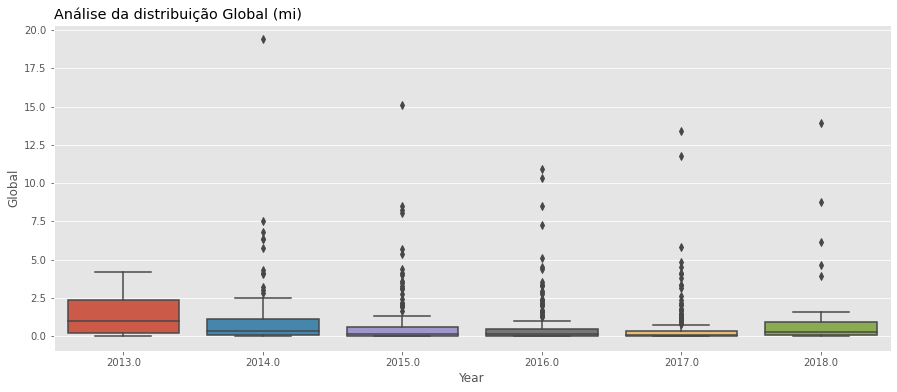

In [83]:
# tamanho
plt.figure(figsize=(15,6))

# título
plt.title('Análise da distribuição Global (mi)', loc='left')

sns.boxplot(data=Base_Dados, x='Year', y='Global');

In [84]:
Base_Dados.loc[Base_Dados['Global'] >= 10]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


In [85]:
# analisando a proporção dos 100% de cada continente comparado ao total
America = [ America / Total * 100 for America, Total in zip(Analise['North America'], Analise['Global'])]
Europa = [ Europa / Total * 100 for Europa, Total in zip(Analise['Europe'], Analise['Global'])]
Japao = [ Japao / Total * 100 for Japao, Total in zip(Analise['Japan'], Analise['Global'])]
Mundo = [ Mundo / Total * 100 for Mundo, Total in zip(Analise['Rest of World'], Analise['Global'])]

America, Europa, Japao, Mundo

([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

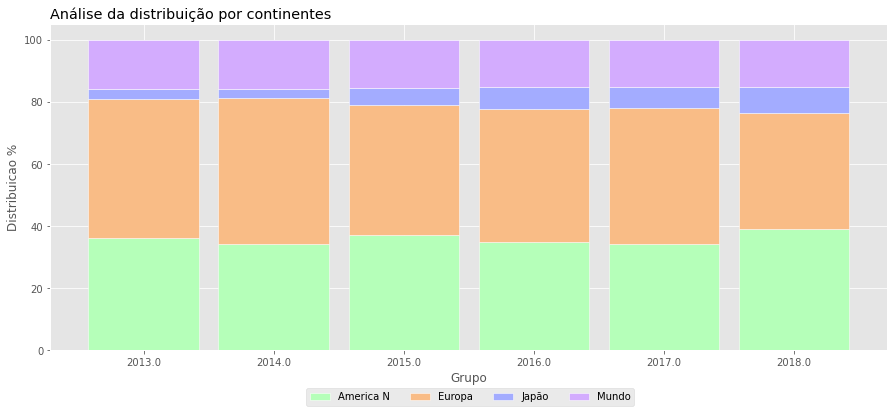

In [106]:
# tamanho
plt.figure(figsize=(15,6))


# largura da barra no gráfico
Largura_Barra = 0.85
Rotulos = Analise.index
Grupos = [0 ,1, 2, 3, 4, 5]

# título
plt.title('Análise da distribuição por continentes', loc='left')

# plot da América
plt.bar(Grupos, America, width=Largura_Barra, color='#b5ffb9', edgecolor='white')

# plot da Europa
plt.bar(Grupos, Europa, bottom=America, width=Largura_Barra, color='#f9bc86', edgecolor='white')

# plot do Japão
plt.bar(Grupos, Japao, bottom=[A + B for A, B in zip(America, Europa)], width=Largura_Barra, color='#a3acff', edgecolor='white')

# plot do resto do mundo
plt.bar(Grupos, Mundo, bottom=[A + B + C for A, B, C in zip(America, Europa, Japao)], width=Largura_Barra, color='#d3acfe', edgecolor='white')

# labels
plt.xticks(Grupos, Rotulos)
plt.xlabel('Grupo')
plt.ylabel('Distribuicao %')

# legenda
plt.legend(['America N', 'Europa', 'Japão', 'Mundo'], loc='upper left', bbox_to_anchor=(0.3, -0.1), ncol=4);

In [109]:
Base_Dados['Publisher'].unique()

array(['Rockstar Games', 'Activision', 'EA Sports', 'Electronic Arts',
       'Sony Interactive Entertainment', 'Bethesda Softworks',
       'Sony Computer Entertainment', 'Namco Bandai Games', 'Square Enix',
       'Capcom', 'Blizzard Entertainment', 'Ubisoft',
       'Warner Bros. Interactive', '2K Sports',
       'Warner Bros. Interactive Entertainment',
       'Konami Digital Entertainment', '2K Games', 'Hello Games',
       '505 Games', 'Deep Silver', 'Take-Two Interactive',
       'Bandai Namco Games', 'Sega', 'Tecmo Koei', 'Gearbox Software',
       'Mojang', 'Disney Interactive Studios', 'Focus Home Interactive',
       'Studio Wildcard', 'Codemasters', 'Koch Media',
       'Harmonix Music Systems', 'Rebellion Developments', 'Gun Media',
       'Telltale Games', 'Kalypso Media', 'City Interactive',
       'NIS America', 'Sold Out', 'Tripwire Interactive', 'PQube',
       'THQ Nordic', 'Milestone S.r.l.', 'Nordic Games', 'Astragon',
       'Koei Tecmo', 'Frontier Developments', 

In [113]:
from sklearn.preprocessing import LabelEncoder
Funcao_Label = LabelEncoder()

Base_Dados['Produtor'] = Funcao_Label.fit_transform(Base_Dados['Publisher'])
Base_Dados['Genero'] = Funcao_Label.fit_transform(Base_Dados['Genre'])
Base_Dados['Jogo'] = Funcao_Label.fit_transform(Base_Dados['Game'])

Base_Dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


In [117]:
Paleta_Cores = sns.color_palette('husl', 8)
Paleta_Cores

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

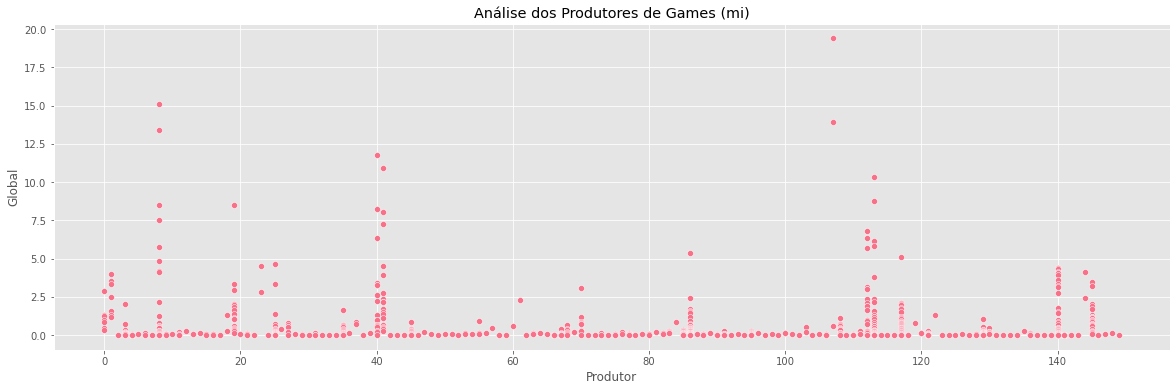

In [123]:
plt.figure(figsize=(20,6))
plt.title('Análise dos Produtores de Games (mi)')
sns.scatterplot(data=Base_Dados, x='Produtor', y='Global', color=Paleta_Cores[0]);

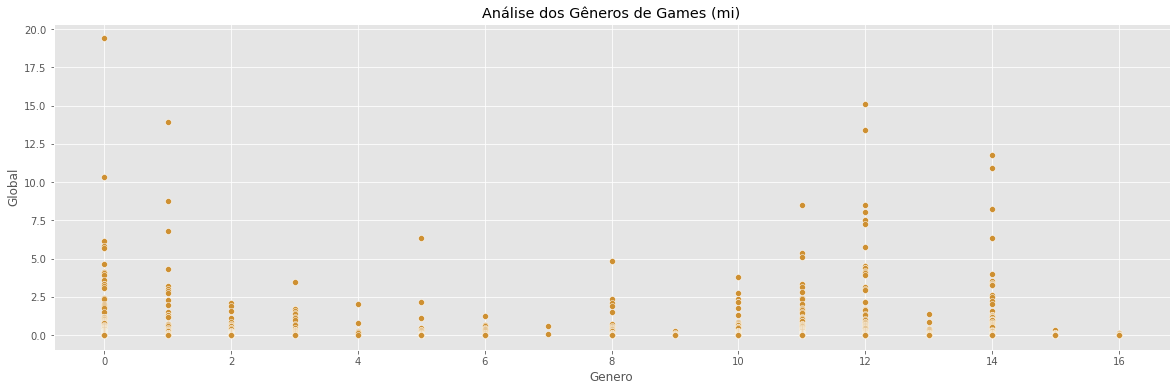

In [125]:
plt.figure(figsize=(20,6))
plt.title('Análise dos Gêneros de Games (mi)')
sns.scatterplot(data=Base_Dados, x='Genero', y='Global', color=Paleta_Cores[1]);

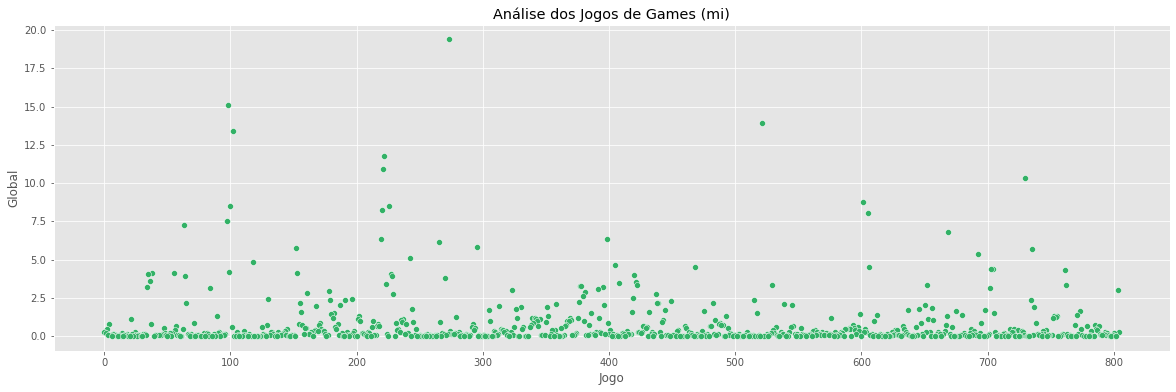

In [127]:
plt.figure(figsize=(20,6))
plt.title('Análise dos Jogos de Games (mi)')
sns.scatterplot(data=Base_Dados, x='Jogo', y='Global', color=Paleta_Cores[3]);